Входные данные - исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы из открытых источников до 2016 года.

**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 
компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.*

## Изучение данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Наименования столбцов содержат символы разных регистров.

В столбце 'year_of_release' значение года записано как число с плавающей запятой.

В столбце 'user_score' числовые значения, которым не соответствует тип данных object.

В данных есть пропуски.

## Предобработка данных

Посмотрим на долю пропусков в данных:

In [5]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Приведем названия столбцов к нижнему регистру:

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведем значения года в столбце 'year_of_release' к целочисленным:

In [8]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [9]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Заменим тип данных в столбце 'user_score' на float:

In [10]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Посмотрим, за какой период представлены данные, и нет ли в них аномальных значений:

In [12]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


С целью исключить появление неявных дубликатов, приведем строки в столбце 'platform' к нижнему регистру:

In [13]:
df['platform'] = df['platform'].str.lower()

Посмотрим уникальные значения:

In [14]:
df['platform'].value_counts()

ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
gb        98
nes       98
dc        52
gen       29
ng        12
ws         6
scd        6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

С целью исключить появление неявных дубликатов, приведем строки в столбце 'genre' к нижнему регистру:

In [15]:
df['genre'] = df['genre'].str.lower()

Посмотрим уникальные значения:

In [16]:
df['genre'].value_counts()

action          3369
sports          2348
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
Name: genre, dtype: int64

Посмотрим уникальные значения по столбцу 'rating':

In [17]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Расшифровка значений рейтинга ESRB:

E: «Everyone»/«Для всех»

T: «Teen»/«Подросткам»

M: «Mature»/«Для взрослых»

E10+: «Everyone 10 and older»/«Для всех от 10 лет и старше»

EC: «Early childhood»/«Для детей младшего возраста»

K-A: «for Kids to Adults»/«Для детей и взрослых», этот рейтинг использовался до 1998 года, после был переименован в E

RP: «Rating Pending»/«Рейтинг ожидается»

AO: «Adults Only 18+»/«Только для взрослых»

Проверим наличие дубликатов в данных:

In [18]:
df.duplicated().sum()

0

Посчитаем суммарные продажи и добавим их в отдельный столбец:

In [19]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Проверим, что получилось:

In [20]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
all_sales          16715 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


### Вывод

Значения года в столбце 'year_of_release' привели к целочисленным методом astype(), так как это универсальный метод, позволяющий преобразовывать тип данных в любой другой.

При попытке изменить тип данных в столбце 'user_score' методом astype(), получили ошибку: 'строковое значение "tbd"'. tbd - аббревиатура от сокр. 'To Be Determined', что значит "рейтинг ещё не определен", поэтому тип данных изменили методом to_numeric(), который позволяет вернуть недопустимые значения как NaN, что соответствует условиям - рейтинга на самом деле ещё нет.

В столбцах 'critic_score', 'user_score', 'rating' большая доля пропусков, около 40-50%, оставим их без обработки, так как точных данных о пропущенных значениях нет, а замена на конкретное значение без ссылки на источник может сильно исказить результаты исследования. Пропуски в столбцах 'name', 'year_of_release', 'genre' так же оставим без обработки, так как достоверных данных об этих значениях так же нет, доля пропусков небольшая. Причиной появления такого большого количества пропусков может быть то, что на момент заполнения таблицы данных о рейтингах ещё не было, или они были заполнены в формате, который не удалось преобразовать при выгрузке/загрузке данных.

Аномальных значений и дубликатов в данных нет.

Суммарные продажи рассчитаны и добавлены в таблицу.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы:

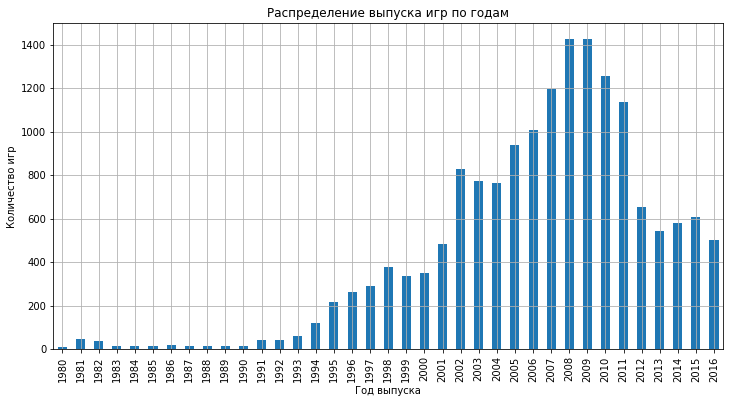

In [22]:
(
    df
    .pivot_table(index='year_of_release',
                 values='name',
                 aggfunc='count')
    .plot(kind='bar',
          rot=90,
          title='Распределение выпуска игр по годам',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Год выпуска',
         ylabel='Количество игр')
)
plt.show()

С начала 90-х гг. рост количества выпускаемых игр, достигает максимальных значений в 2008-2009 гг., затем спад. Так как данные за 2016 г. неполные, можно предположить, что с 2014 г. количество выпускаемых игр снова пошло в рост. Это распределение можно связать с тем, что в 2008 г. дан резкий старт мобильным разработкам, игры постепенно переходят в смартфоны. К 2014 г. насыщение рынка мобильных приложений, те, кто хочет играть, возвращаются к платформам. Кроме того, это распределение можно связать с тем, что разработка самих компьютерных игр так же усложнилась. Нам интересен период, когда разработка игр снова пошла вверх.

Посмотрим, как меняются продажи по платформам:

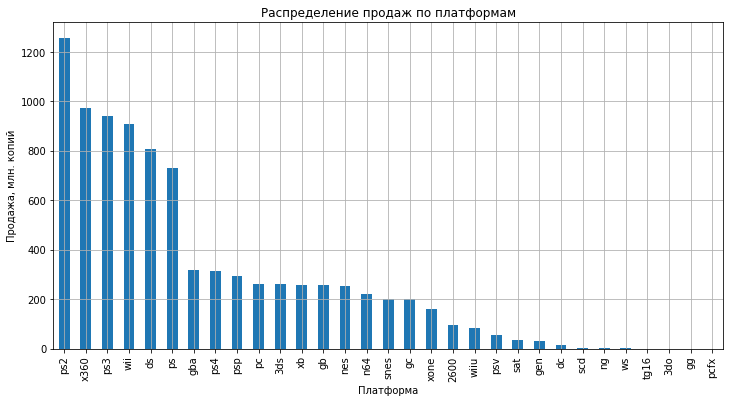

In [23]:
(
    df
    .pivot_table(index='platform',
                 values='all_sales',
                 aggfunc='sum')
    .sort_values(by='all_sales',
                 ascending=False)
    .plot(kind='bar',
          rot=90,
          title='Распределение продаж по платформам',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Платформа',
         ylabel='Продажа, млн. копий')
)
plt.show()

Выберем платформы с наибольшими суммарными продажами:

In [24]:
max_sales = (df
             .pivot_table(index='platform',
                          values='all_sales',
                          aggfunc='sum')
             .sort_values(by='all_sales',
                          ascending=False)
             .head(6)
            )

Построим распределение продаж по годам в разрезе платформ с наибольшими суммарными продажами:

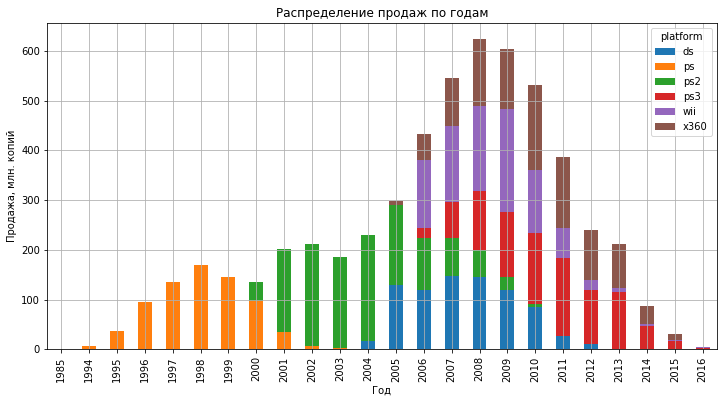

In [25]:
(
    df
    .query('platform in @max_sales.index')
    .pivot_table(index='year_of_release',
                 columns='platform',
                 values='all_sales',
                 aggfunc='sum')
    .plot(kind='bar',
          stacked=True,
          rot=90,
          title='Распределение продаж по годам',
          grid=True,
          figsize=(12,6),
          legend=True)
    .set(xlabel='Год',
         ylabel='Продажа, млн. копий')
)
plt.show()

Из графика видно, что характерный срок, за который появляются новые и исчезают страые платформы, составляет примерно 10 лет. Наибольшую прибыль платформы приносят в первые 5-6 лет своего существования.

Учитывая:
* характреный срок существования платформ 10 лет;
* наибольшую прибыльность платформ в первые 5-6 лет;
* период, когда продажи игр снова пошли в рост начиная с 2014 г.;
* а так же то, что данные за 2016 неполные,

актуальный период для исследования определим как период за 2013-2016 гг.

Получим срез данных и далее будем использовать только его:

In [26]:
df = df.query('year_of_release >= 2013')

Посмотрим, какие платформы лидируют по продажам в актуальном периоде:

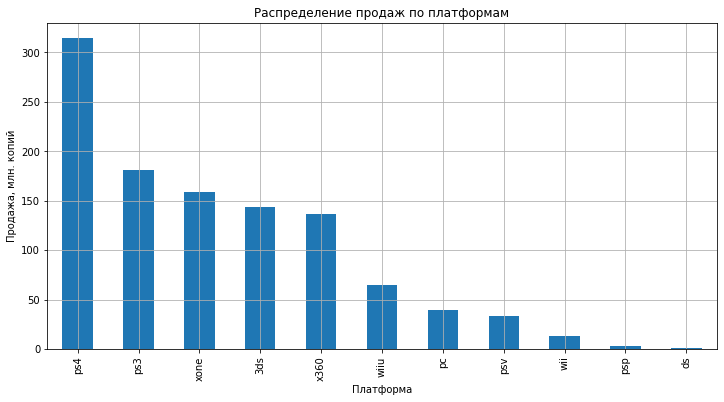

In [27]:
(
    df
    .pivot_table(index='platform',
                 values='all_sales',
                 aggfunc='sum')
    .sort_values(by='all_sales',
                 ascending=False)
    .plot(kind='bar',
          rot=90,
          title='Распределение продаж по платформам',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Платформа',
         ylabel='Продажа, млн. копий')
)
plt.show()

Выберем платформы с наибольшими суммарными продажами:

In [28]:
max_sales_actual = (df
                    .pivot_table(index='platform',
                                 values='all_sales',
                                 aggfunc='sum')
                    .sort_values(by='all_sales',
                                 ascending=False)
                    .head()
                   )

Посмотрим распределение продаж по годам в разрезе платформ:

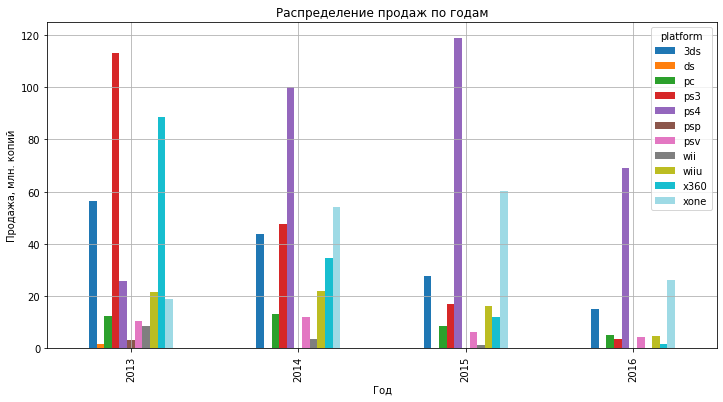

In [29]:
(
    df
    .pivot_table(index='year_of_release',
                 columns='platform',
                 values='all_sales',
                 aggfunc='sum')
    .plot(kind='bar',
          colormap='tab20',
          rot=90,
          title='Распределение продаж по годам',
          grid=True,
          figsize=(12,6),
          legend=True)
    .set(xlabel='Год',
         ylabel='Продажа, млн. копий')
)
plt.show()

Учитывая, что данные за 2016 год неполные, рост показывают PS4 и Xbox One. Будем считать их потенциально прибыльными. PS3, 3DS и Xbox360 показывают снижение. Некоторые платформы показывают завершение цикла, например DS, PSP, Wii.

Построим диаграмму размаха значений продаж в разрезе платформ с наибольшими суммарными продажами:

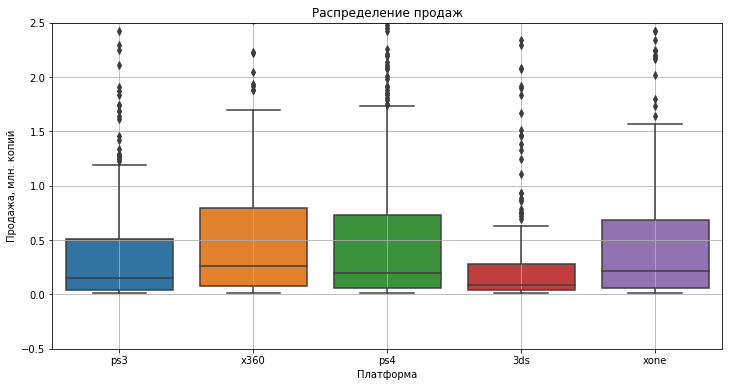

In [30]:
plt.figure(figsize=(12,6))
plt.ylim(-0.5,2.5)
sns.boxplot(data=df.query('platform in @max_sales_actual.index'),
            x='platform',
            y='all_sales')
plt.xlabel('Платформа')
plt.ylabel('Продажа, млн. копий')
plt.title('Распределение продаж')
plt.grid(True)
plt.show()

В общем распределения похожи: нижняя граница первого квартиля лежит на 0, все датасеты скошены вправо, везде длинный хвост редких значений. В распределении продаж потенциально прибыльных платформ половина значений лежит в пределах 200-250 тыс. проданных копий, большая часть значений в пределах 750 тыс. проданных копий, диапазон нормальных значений до 1,75 млн. проданных копий PS4 и до 1,6 млн. проданных копий Xbox One. Распределение продаж Xbox360 немного смещено вправо относительно потенциально прибыльных платформ. Распределение продаж PS3 смещено влево относительно потенциально прибыльных платформ, ещё больше влево смещено распределение продаж 3DS. Можно сказать, что PS4 и Xbox One имеют схожее по структуре распределение продаж.

Построим корреляционную матрицу и посмотрим, как влияют на продажи внутри платформ отзывы пользователей и критиков:

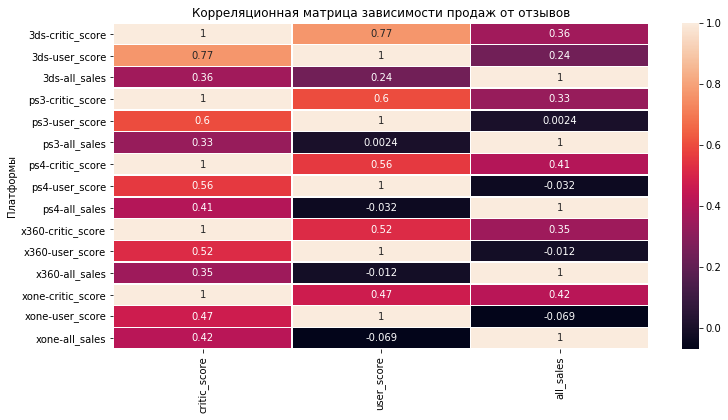

In [31]:
corr_matrix=(df
             .query('platform in @max_sales_actual.index')
             .groupby('platform')[['critic_score','user_score','all_sales']]
             .corr()
)
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.yticks(rotation=360)
plt.xticks(rotation=90)
plt.ylabel('Платформы')
plt.title('Корреляционная матрица зависимости продаж от отзывов')
plt.show()

Отзывы критиков слабо влияют на продажи, отзывы пользователей на продажи почти не влияют.

Посмотрим на общее распределение игр по жанрам:

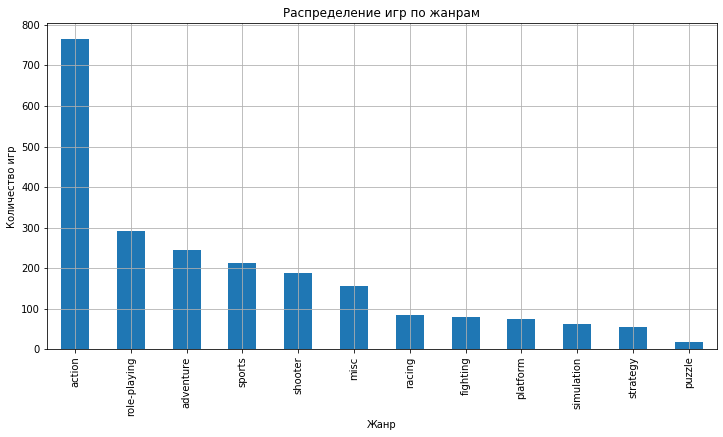

In [32]:
(
    df
    .pivot_table(index='genre',
                 values='name',
                 aggfunc='count')
    .sort_values(by='name',
                 ascending=False)
    .plot(kind='bar',
          rot=90,
          title='Распределение игр по жанрам',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Жанр',
         ylabel='Количество игр')
)
plt.show()

Особенно выделяются игры жанра "Экшен", их больше всего.

Посмотрим на распределение продаж по жанрам:

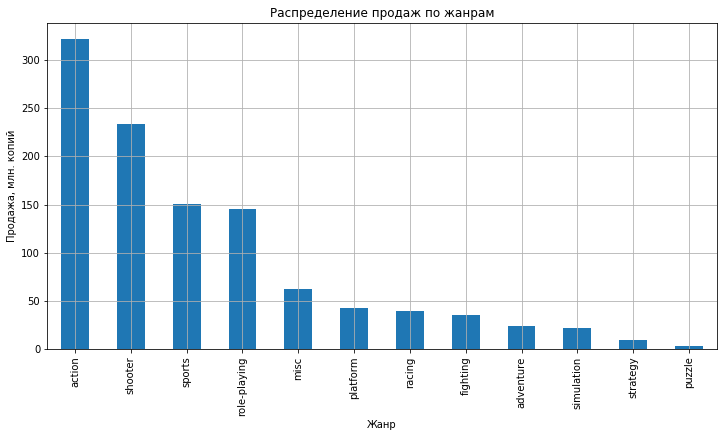

In [33]:
(
    df
    .pivot_table(index='genre',
                 values='all_sales',
                 aggfunc='sum')
    .sort_values(by='all_sales',
                 ascending=False)
    .plot(kind='bar',
          rot=90,
          title='Распределение продаж по жанрам',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Жанр',
         ylabel='Продажа, млн. копий')
)
plt.show()

Наиболее прибыльными можно считать игры жанра Action и Shooter, почти в два раза менее прибыльные Sports и Role-Playing. Наименее прибыльные Strategy и Puzzle. Такую тенденцию так же можно связать с переходом наименее популярных жанров в формат мобильных приложений. 

### Вывод

В ходе анализа установлено:
* период, за который появляются и исчезают платформы, составляет около 10 лет;
* период, в котором платформы приносят наибольшую прибыль, составляет первые 5-6 лет;
* с учетом установленных периодов и распределения выпуска игр по годам, актуальным периодом для проведения исследования является период с 2013 по 2016 гг.

Дальнейший анализ выполнен по данным актуального периода, в ходе анализа установлено:
* потенциально прибыльными являются платформы PS4 и Xbox One;
* платформы Xbox One и PS4 имеют схожее по структуре распределение продаж;
* отзывы критиков слабо влияют на продажи, отзывы пользователей на продажи почти не влияют;
* наиболее прибыльными являются игры жанров Action и Shooter.

Анализ данных выполнен с помощью графиков plot() и коэффициента корреляции Пирсона.

## Портрет пользователя

### Топ-5 популярных платформ

Посмотрим популярные платформы в Северной Америке:

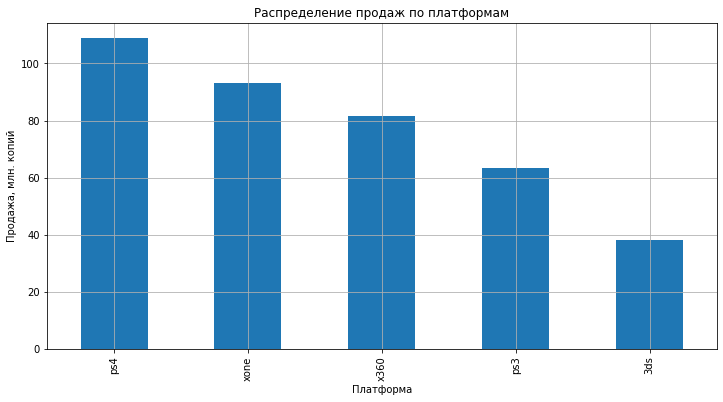

In [34]:
(
    df
    .pivot_table(index='platform',
                 values='na_sales',
                 aggfunc='sum')
    .sort_values(by='na_sales',
                 ascending=False)
    .head()
    .plot(kind='bar',
          rot=90,
          title='Распределение продаж по платформам',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Платформа',
         ylabel='Продажа, млн. копий')
)
plt.show()

Посмотрим популярные платформы в Европе:

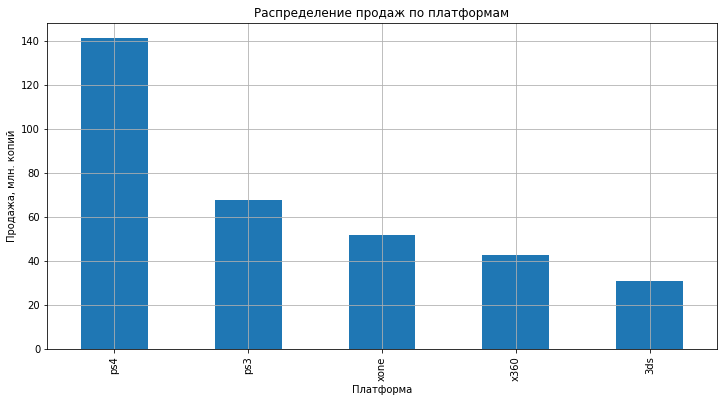

In [35]:
(
    df
    .pivot_table(index='platform',
                 values='eu_sales',
                 aggfunc='sum')
    .sort_values(by='eu_sales',
                 ascending=False)
    .head()
    .plot(kind='bar',
          rot=90,
          title='Распределение продаж по платформам',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Платформа',
         ylabel='Продажа, млн. копий')
)
plt.show()

Посмотрим популярные платформы в Японии:

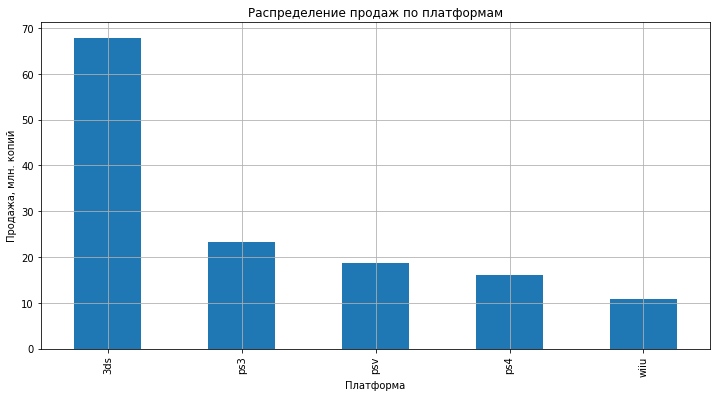

In [36]:
(
    df
    .pivot_table(index='platform',
                 values='jp_sales',
                 aggfunc='sum')
    .sort_values(by='jp_sales',
                 ascending=False)
    .head()
    .plot(kind='bar',
          rot=90,
          title='Распределение продаж по платформам',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Платформа',
         ylabel='Продажа, млн. копий')
)
plt.show()

#### Вывод

Популярные платформы в Америке и в Европе не отличаются от популярных платформ в общей выборке. Немного смещено распределение продаж по платформам, но наибольшая доля продаж так же принадлежит PS4. Совсем другое распределение в Японии - максимальная доля продаж принадлежит 3DC, кроме PS3 и PS4, так же популярны PSV и WiiU, доля которых в суммарных продажах относительно небольшая. Xbox One и Xbox 360, которые занимают значительную долю продаж в общей выборке, не популярны в Японии и не попали в топ-5.

### Топ-5 популярных жанров

Посмотрим популярные жанры в Америке:

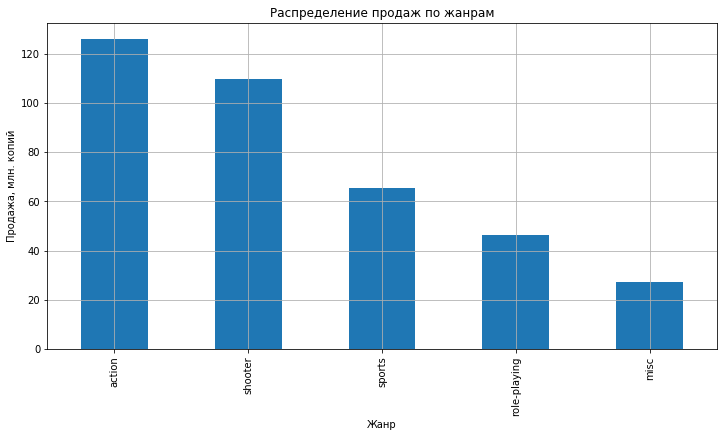

In [37]:
(
    df
    .pivot_table(index='genre',
                 values='na_sales',
                 aggfunc='sum')
    .sort_values(by='na_sales',
                 ascending=False)
    .head()
    .plot(kind='bar',
          rot=90,
          title='Распределение продаж по жанрам',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Жанр',
         ylabel='Продажа, млн. копий')
)
plt.show()

Посмотрим популярные жанры в Европе:

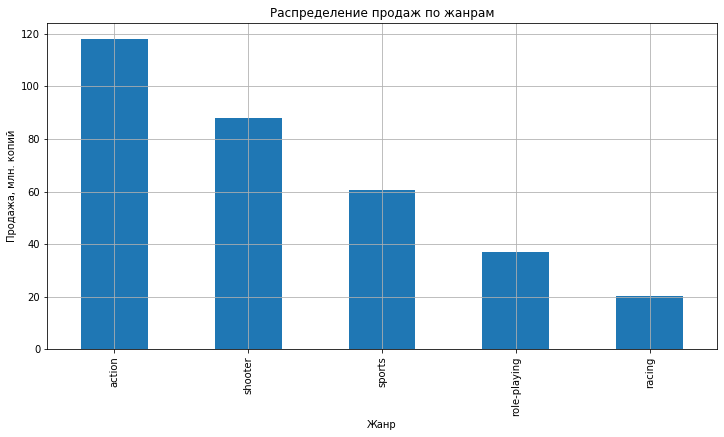

In [38]:
(
    df
    .pivot_table(index='genre',
                 values='eu_sales',
                 aggfunc='sum')
    .sort_values(by='eu_sales',
                 ascending=False)
    .head()
    .plot(kind='bar',
          rot=90,
          title='Распределение продаж по жанрам',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Жанр',
         ylabel='Продажа, млн. копий')
)
plt.show()

Посмотрим популярные жанры в Японии:

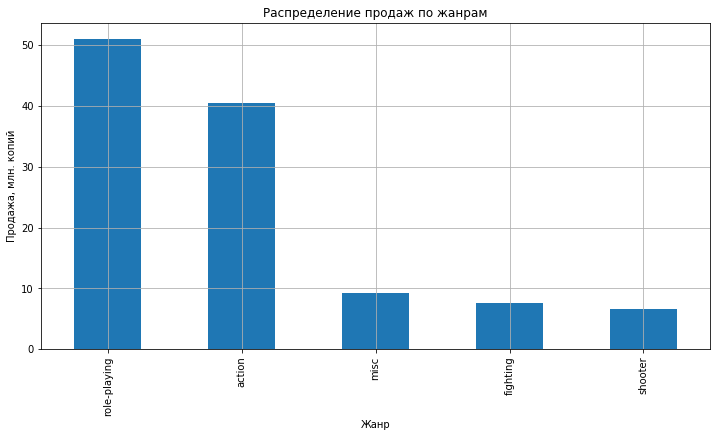

In [39]:
(
    df
    .pivot_table(index='genre',
                 values='jp_sales',
                 aggfunc='sum')
    .sort_values(by='jp_sales',
                 ascending=False)
    .head()
    .plot(kind='bar',
          rot=90,
          title='Распределение продаж по жанрам',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Жанр',
         ylabel='Продажа, млн. копий')
)
plt.show()

#### Вывод

Популярные жанры в Америке и в Европе не отличаются от популярных жанров в общей выборке, имеют схожее распределение, за исключением того, что в топ-5 Европы вместо Misk вошел Racing. Совсем другое распределение в Японии - максимальная доля продаж принадлежит Role-Playing, чуть менее популярен Action, и на равных меньших долях располагаются Misk, Fighting и Shooter. Это можно объяснить тем, что Япония является страной происхождения поджанра JRPG, который учитывает национальные особенности, за счет чего очень популярен внутри страны и, скорее всего, входит в общий Role-Playing.

### Зависимость продаж от рейтинга ESRB

Посмотрим, влияет ли рейтинг ESRB на продажи в Америке:

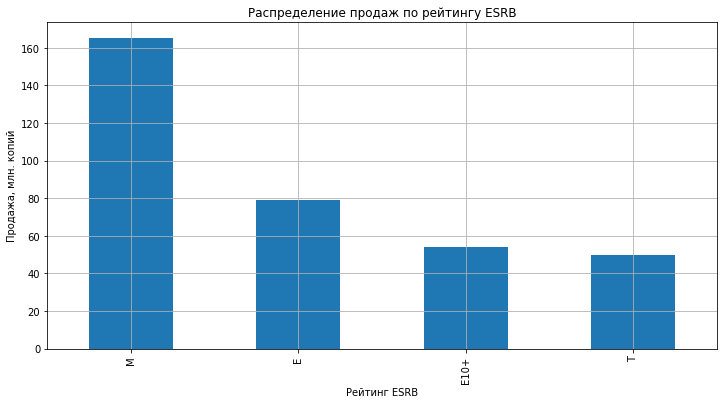

In [40]:
(
    df
    .pivot_table(index='rating',
                 values='na_sales',
                 aggfunc='sum')
    .sort_values(by='na_sales',
                 ascending=False)
    .plot(kind='bar',
          rot=90,
          title='Распределение продаж по рейтингу ESRB',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Рейтинг ESRB',
         ylabel='Продажа, млн. копий')
)
plt.show()

Посмотрим, влияет ли рейтинг ESRB на продажи в Европе:

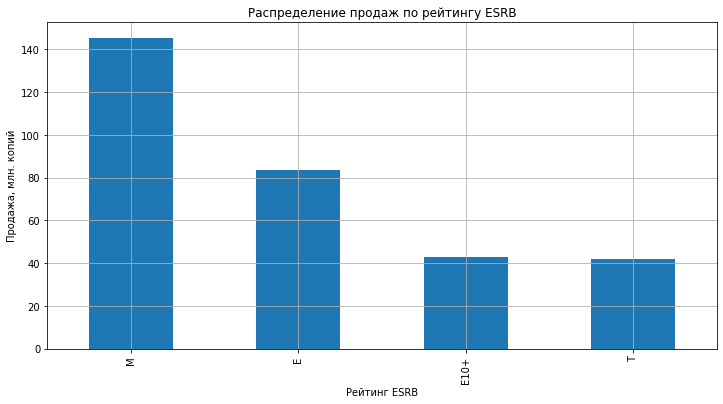

In [41]:
(
    df
    .pivot_table(index='rating',
                 values='eu_sales',
                 aggfunc='sum')
    .sort_values(by='eu_sales',
                 ascending=False)
    .plot(kind='bar',
          rot=90,
          title='Распределение продаж по рейтингу ESRB',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Рейтинг ESRB',
         ylabel='Продажа, млн. копий')
)
plt.show()

Посмотрим, влияет ли рейтинг ESRB на продажи в Японии:

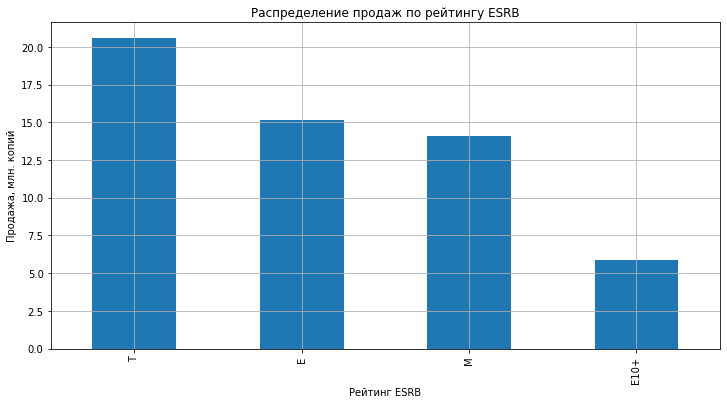

In [42]:
(
    df
    .pivot_table(index='rating',
                 values='jp_sales',
                 aggfunc='sum')
    .sort_values(by='jp_sales',
                 ascending=False)
    .plot(kind='bar',
          rot=90,
          title='Распределение продаж по рейтингу ESRB',
          grid=True,
          figsize=(12,6),
          legend=False)
    .set(xlabel='Рейтинг ESRB',
         ylabel='Продажа, млн. копий')
)
plt.show()

#### Вывод

Распределение продаж по рейтингу в Америке и в Европе схожее, наибольшую долю продаж занимают игры "Для взрослых", в два раза меньше продаж занимают игры "Для всех", в два раза меньше почти в равных долях распределены игры "Для всех от 10 лет и старше" и "Подросткам". В Японии максимальную долю продаж занимают игры "Подросткам", чуть меньше в равных долях расположены игры "Для всех" и "Для взрослых", наименьшую долю продаж имеют игры с рейтингом "Для всех от 10 лет и старше". Это распределение можно сравнить с распределением популярных жанров, примерно такие рейтинги и в таких долях и должны иметь соответствующие жанры.

### Вывод

Портреты пользователей из Северной Америки и Европы почти не отличаются от портрета пользователя из общего распределения. Портрет пользователя из Японии имеет некоторые существенные отличия:
* наиболее популярная платформа 3DC;
* так же популярны платформы PSV и WiiU, доля которых в суммарных продажах относительно небольшая;
* совсем не популярны Xbox One и Xbox 360, которые занимают значительную долю в суммарных продажах;
* наиболее популярный жанр Role-Playing.

## Проверка гипотез

### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Получим срез данных по платформе Xbox One:

In [43]:
df_xone = df.query('platform == "xone"')

Получим срез данных по PC:

In [44]:
df_pc = df.query('platform == "pc"')

Сформулируем нулевую гипотезу так: "средние пользовательские рейтинги платформ Xbox One и PC равны", тогда альтернативную гипотезу сформулируем так: "средние пользовательские рейтинги платформ Xbox One и PC различаются". Зададим уровень значимости 5% и рассчитаем p-value:

In [45]:
alpha = 0.05
results = st.ttest_ind(df_xone['user_score'], df_pc['user_score'], nan_policy='omit')
results.pvalue

0.1401265840361139

Проверим, является ли результат статистически значимым:

In [46]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Рассчитаем средний пользовательский рейтинг платформы Xbox One:

In [47]:
df_xone['user_score'].mean()

6.521428571428572

Рассчитаем средний пользовательский рейтинг PC:

In [48]:
df_pc['user_score'].mean()

6.269677419354839

Посмотрим распределение пользовательских рейтингов по платформам Xbox One и PC:

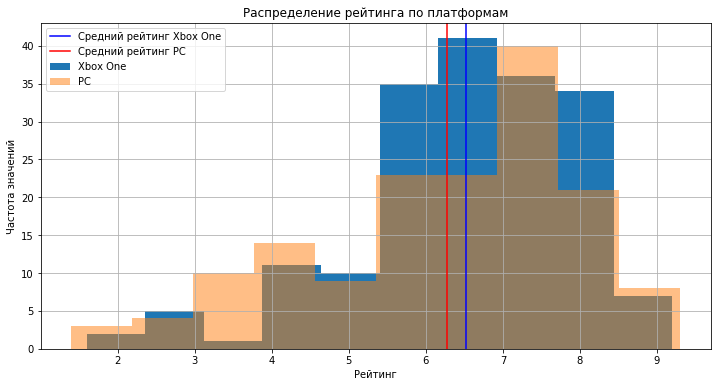

In [49]:
plt.figure(figsize=(12,6))
plt.hist(df_xone['user_score'], alpha=1, label='Xbox One')
plt.hist(df_pc['user_score'], alpha=0.5, label='PC')
plt.axvline(x=df_xone['user_score'].mean(), color='blue', label='Средний рейтинг Xbox One')
plt.axvline(x=df_pc['user_score'].mean(), color='red', label='Средний рейтинг PC')
plt.xlabel('Рейтинг')
plt.ylabel('Частота значений')
plt.title('Распределение рейтинга по платформам')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#### Вывод

Для выбранного уровня значимости не получилось отвергнуть нулевую гипотезу. Полученное значение p-value говорит о том, что хотя средний пользовательский рейтинг платформ Xbox One и PC различается, такое или большее различие можно получить случайно с вероятностью 14%, и это слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами. Вывод - средний пользовательский рейтинг платформы Xbox One не отличается от среднего пользовательского рейтинга платформы PC.

### Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

Получим срез данных по жанру Action:

In [50]:
df_action = df.query('genre == "action"')

Получим срез данных по жанру Sports:

In [51]:
df_sports = df.query('genre == "sports"')

Сформулируем нулевую гипотезу так: "средние пользовательские рейтинги жанров Action и Sports равны", тогда альтернативную гипотезу сформулируем так: "средние пользовательские рейтинги жанров Action и Sports различаются". Зададим уровень значимости 5% и рассчитаем p-value:

In [52]:
alpha = 0.05
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], nan_policy='omit')
results.pvalue

1.0517832389142297e-27

Проверим, является ли результат статистически значимым:

In [53]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Рассчитаем средний пользовательский рейтинг жанра Action:

In [54]:
df_action['user_score'].mean()

6.837532133676093

Рассчитаем средний пользовательский рейтинг жанра Sports:

In [55]:
df_sports['user_score'].mean()

5.238124999999999

Посмотрим распределение пользовательских рейтингов по жанрам Action и Sports:

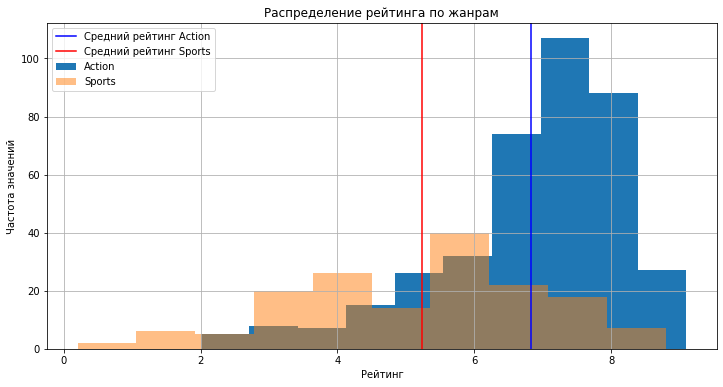

In [56]:
plt.figure(figsize=(12,6))
plt.hist(df_action['user_score'], alpha=1, label='Action')
plt.hist(df_sports['user_score'], alpha=0.5, label='Sports')
plt.axvline(x=df_action['user_score'].mean(), color='blue', label='Средний рейтинг Action')
plt.axvline(x=df_sports['user_score'].mean(), color='red', label='Средний рейтинг Sports')
plt.xlabel('Рейтинг')
plt.ylabel('Частота значений')
plt.title('Распределение рейтинга по жанрам')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#### Вывод

Для выбранного уровня значимости отвергаем нулевую гипотезу. Вывод - средний пользовательский рейтинг жанров Action и Sports различается. Исходя из проверки гипотезы, можно сказать только то, что рейтинг различается, так как гипотеза двусторонняя. Однако посчитав средний рейтинг пользователей по жанрам, можно сказать, что средний пользовательский рейтинг жанра Action больше, чем средний пользовательский рейтинг жанра Sports.

### Вывод

Для проведения статистического теста использовали срезы данных и метод ttest_ind() для двух независимых выборок. Так как выборки получены из одной совокупности, параметр equal_var укажем как True и оценим дисперсию каждой выборки по объединенному датасету. Нулевую гипотезу сформулируем так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем как двустороннюю, т.е. так, что отклонение наблюдаемых значений возможно в обе стороны. Критический уровень статистической значимости принимаем равным стандартным 5%. Результат проверки гипотез:

* средний пользовательский рейтинг платформы Xbox One не отличается от среднего пользовательского рейтинга платформы PC;

* средний пользовательский рейтинг жанра Action больше, чем средний пользовательский рейтинг жанра Sports.

## Общий вывод

Выполнен анализ данных о компьютерных играх, доступных из открытых источников. В данных по отзывам критиков и пользователей, а так же в данных по рейтингу ESRB около 40-50% пропусков оставлены без обработки, так как заполнение пропущенных значений без ссылки на конкретный источник исказит результаты исследования. С учетом выявленных закономерностей:
* рост выпуска игр с 2014г.;
* срок, в течение которого появляются и исчезают платформы около 10 лет;
* срок, в течение которого платформы приносят наибольшую прибыль первые 5-6 лет,

установлен актуальный период для проведения исследования с 2013 по 2016 гг.

Анализ данных выполнен с учетом актуального периода.

Анализ данных выполнен с помощью графиков plot() и коэффициента корреляции Пирсона.

В ходе анализа установлено:
* потенциально прибыльными являются платформы PS4 и Xbox One;
* платформы PS4 и Xbox One имеют схожее по структуре распределение продаж;
* отзывы критиков слабо влияют на продажи, отзывы пользователей на продажи почти не влияют;
* наиболее прибыльными являются игры жанров Action и Shooter.

Составлен портрет пользователя по основным регионам продаж. Портрет пользователя соответствует закономерностям общей выборки, за исключением пользователей из Японии, их портрет имеет следующие особенности:
* наиболее популярная платформа 3DC;
* так же популярны платформы PSV и WiiU, доля которых в суммарных продажах относительно небольшая;
* совсем не популярны Xbox One и Xbox 360, которые занимают значительную долю в суммарных продажах;
* наиболее популярный жанр Role-Playing.

Проверены гипотезы, в результате проверки установлено:
* средний пользовательский рейтинг платформы Xbox One не отличается от среднего пользовательского рейтинга платформы PC;
* средний пользовательский рейтинг жанра Action больше, чем средний пользовательский рейтинг жанра Sports.

При планировании рекламных компаний следует учитывать:
* потенциально прибыльными являются платформы PS4 и Xbox One;
* потенциально популярными являются игры жанров Action и Shooter;
* при планировании рекламных компаний в Японии следует учитывать особенности портрета пользователя.